## 9. K-Means Clustering

### This script contains the following:
1. Importing libraries and data
2. Standardize data
3. Elbow technique to determine n-clusters
4. k-Means clustering
5. Export subset dataframe

### 1. Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\Neena Tilton\Dropbox\Projects\MinWage_Crime'

In [4]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_newvar_2.pkl'))

In [5]:
df.head()

,Year,State,state_mw,state_mw_2020,fed_mw,fed_mw_2020,effective_mw,effective_mw_2020,prisoner_count,state_population,violent_crime,murder,robbery,burglary,incarceration_rate,rate_rank,avg_rate_of_year,viol_crime_rate
0,2001,Alabama,0.00,0.00,5.15,7.52,5.15,7.52,24741.0,4468912.0,19582.0,379.0,5584.0,40642.0,0.005536,High,0.003832,0.004382
1,2001,Alaska,5.65,8.25,5.15,7.52,5.65,8.25,4570.0,633630.0,3735.0,39.0,514.0,3847.0,0.007212,Unusually High,0.003832,0.005895
2,2001,Arizona,0.00,0.00,5.15,7.52,5.15,7.52,27710.0,5306966.0,28675.0,400.0,8868.0,54821.0,0.005221,High,0.003832,0.005403
3,2001,Arkansas,5.15,7.52,5.15,7.52,5.15,7.52,11489.0,2694698.0,12190.0,148.0,2181.0,22196.0,0.004264,Medium,0.003832,0.004524
4,2001,California,6.25,9.13,5.15,7.52,6.25,9.13,157142.0,34600464.0,212867.0,2206.0,64614.0,232273.0,0.004542,Medium,0.003832,0.006152


In [6]:
df.shape

(800, 18)

In [7]:
df.columns

Index(['Year', 'State', 'state_mw', 'state_mw_2020', 'fed_mw', 'fed_mw_2020',
       'effective_mw', 'effective_mw_2020', 'prisoner_count',
       'state_population', 'violent_crime', 'murder', 'robbery', 'burglary',
       'incarceration_rate', 'rate_rank', 'avg_rate_of_year',
       'viol_crime_rate'],
      dtype='object')

In [8]:
df_sub = df[['state_mw', 'incarceration_rate', 'viol_crime_rate']]

In [9]:
df_sub.head()

,state_mw,incarceration_rate,viol_crime_rate
0,0.00,0.005536,0.004382
1,5.65,0.007212,0.005895
2,0.00,0.005221,0.005403
3,5.15,0.004264,0.004524
4,6.25,0.004542,0.006152


In [10]:
df_sub.shape

(800, 3)

### 2. Standardize data

The 'incarceration_rate' and 'viol_crime_rate' are too small compared to the State Minimum Wage. The rates are percent rate still in decimal form so they will be scaled by 100 first. 

In [11]:
# Create an array of all values in 'incarceration_rate' multiplied by 100
# This will convert 0.005536 to 0.5536, read as 0.55%.

incar_rate_scaled = []

for value in df_sub['incarceration_rate']:
    if value > 0:
        ans = value*100
        incar_rate_scaled.append(ans)
    else:
        incar_rate_scaled.append(np.nan)

In [12]:
# Create a new column to attach values in resulting array. 

df_sub['incar_rate_scaled'] = incar_rate_scaled

C:\Users\NEENAT~1\AppData\Local\Temp/ipykernel_16412/2500427793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['incar_rate_scaled'] = incar_rate_scaled


In [13]:
df_sub.head()

,state_mw,incarceration_rate,viol_crime_rate,incar_rate_scaled
0,0.00,0.005536,0.004382,0.553625
1,5.65,0.007212,0.005895,0.721241
2,0.00,0.005221,0.005403,0.522144
3,5.15,0.004264,0.004524,0.426356
4,6.25,0.004542,0.006152,0.454162


In [14]:
df_sub.isnull().sum()

state_mw              0
incarceration_rate    0
viol_crime_rate       0
incar_rate_scaled     0
dtype: int64

In [15]:
# Create an array of all values in 'viol_crime_rate' multiplied by 100
# This will convert 0.004382 to 0.4382, read as 0.44%.

viol_crime_scaled = []

for value in df_sub['viol_crime_rate']:
    if value > 0:
        ans = value*100
        viol_crime_scaled.append(ans)
    else:
        viol_crime_scaled.append(np.nan)

In [16]:
df_sub['viol_crime_scaled'] = viol_crime_scaled

C:\Users\NEENAT~1\AppData\Local\Temp/ipykernel_16412/1867924450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['viol_crime_scaled'] = viol_crime_scaled


In [17]:
df_sub.head()

,state_mw,incarceration_rate,viol_crime_rate,incar_rate_scaled,viol_crime_scaled
0,0.00,0.005536,0.004382,0.553625,0.438183
1,5.65,0.007212,0.005895,0.721241,0.589461
2,0.00,0.005221,0.005403,0.522144,0.540328
3,5.15,0.004264,0.004524,0.426356,0.452370
4,6.25,0.004542,0.006152,0.454162,0.615214


In [18]:
df_sub.isnull().sum()

state_mw              0
incarceration_rate    0
viol_crime_rate       0
incar_rate_scaled     0
viol_crime_scaled     0
dtype: int64

We no longer need the original columns for 'viol_crime_rate' and 'incarceration_rate', thus drop them from the subset.

In [19]:
df_sub.drop(columns = ['incarceration_rate','viol_crime_rate'], inplace = True)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df_sub.head()

,state_mw,incar_rate_scaled,viol_crime_scaled
0,0.00,0.553625,0.438183
1,5.65,0.721241,0.589461
2,0.00,0.522144,0.540328
3,5.15,0.426356,0.452370
4,6.25,0.454162,0.615214


### 3. Elbow technique to determine n-clusters

In [21]:
# Define the range of potential clusters in data.
num_cl = range(1,10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [22]:
# Create a score that represents a rate of variation for the given cluster number option. 

score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]

score

[-4998.828496773151,
 -1227.8388536279556,
 -420.196437928743,
 -286.1356306141747,
 -153.35890032483462,
 -104.14522311666649,
 -80.93459409821877,
 -61.766877069441485,
 -54.43164392504729]

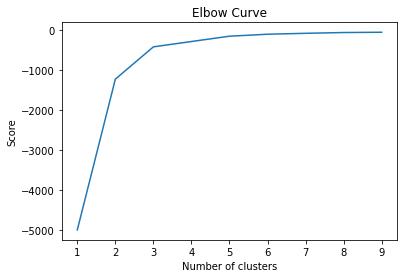

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve flattens off dramatically after three clusters. The optimal count of clusters for the dataframe is 3. 

### 4. k-Means clustering

In [24]:
# Create k-means object

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [25]:
kmeans.fit(df_sub)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [26]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\Neena Tilton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\NEENAT~1\AppData\Local\Temp/ipykernel_16412/4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [27]:
df_sub.head()

,state_mw,incar_rate_scaled,viol_crime_scaled,clusters
0,0.00,0.553625,0.438183,1
1,5.65,0.721241,0.589461,2
2,0.00,0.522144,0.540328,1
3,5.15,0.426356,0.452370,2
4,6.25,0.454162,0.615214,2


In [28]:
df_sub['clusters'].value_counts()

0    411
2    266
1    123
Name: clusters, dtype: int64

In [29]:
411+266+123

800

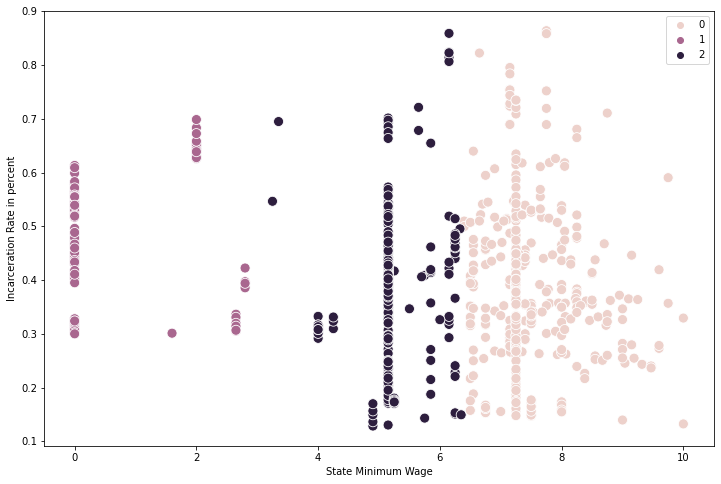

In [30]:
# Plot the clusters for 'state_mw' and 'incar_rate_scaled' variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x=df_sub['state_mw'], y=df_sub['incar_rate_scaled'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('State Minimum Wage')
plt.ylabel('Incarceration Rate in percent')
plt.show()

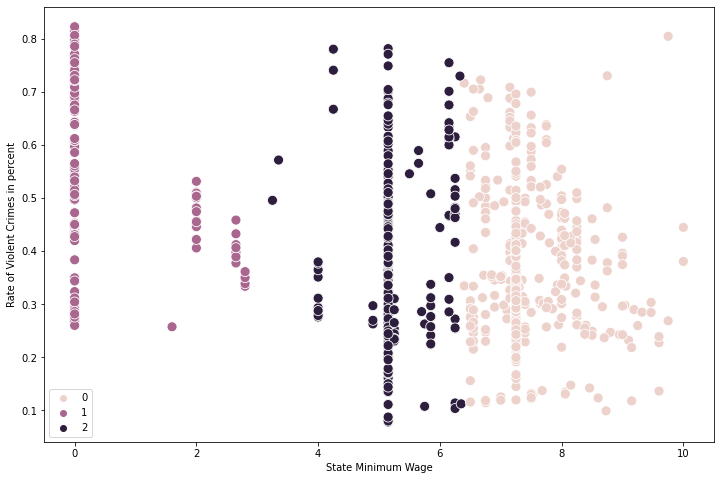

In [31]:
# Plot the clusters for 'state_mw' and 'viol_crime_scaled' variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x=df_sub['state_mw'], y=df_sub['viol_crime_scaled'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('State Minimum Wage')
plt.ylabel( 'Rate of Violent Crimes in percent')
plt.show()

In [32]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Neena Tilton\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Neena Tilton\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
cluster_stats = df_sub.groupby('cluster').agg({'state_mw': ['mean', 'median'],
                                 'viol_crime_scaled': ['mean', 'median'],
                                 'incar_rate_scaled': ['mean', 'median']})

In [36]:
cluster_stats.to_csv(os.path.join(path, "04_Analysis", 'cluster_stats.csv'))

The dark-purple cluster has:
- Average minimum wage of $ 0.60
- Average violent crime rate of 0.50%
- Average incarceration rate of 0.49%

The pink cluster has:
- Average minimum wage of $ 5.25
- Average violent crime rate of 0.37%
- Average incarceration rate of 0.38%

The purple cluster has:
- Average minimum wage of $ 7.50
- Average violent crime rate of 0.36%
- Average incarceration rate of 0.38%

### 5. Export subset dataframe

In [37]:
df_sub.to_csv(os.path.join(path, "02_Data", "PreparedData", 'Subset_clustered.csv'))